# Coursework A - Observation Planning, Data Analysis & Photometry

This coursework should take you <b>approximately 1-2h to complete</b> and is worth <b>20% of your grade for this unit</b>. Ensure that any calculations run correctly, i.e. make sure there are no typos in any Python code you include. Check this by running all cells before submission. Watch the short video that explains how to use this notebook.

For answering the questions, you will be provided with images just like the ones in Chapter2_AperturePhotometry. These are simulated specifically for you given your Student ID. You can use the functions .get_data, .plot_x, .plot_y and .show_ima to interrogate the data. The functions that allow you to check your answer are however disabled. 

Answer all questions in the boxes provided.

You can add additional cells to import any functions you wrote for other notebooks.

Add your Student ID below:

<b>IMPORTANT: DO NOT CHANGE WHILE WORKING ON YOUR COURSEWORK, IT IS USED TO CREATE A RANDOM DATASET BASED ON YOUR ID! </b>

In [177]:
studentid = 23746

In [178]:
%load_ext autoreload
from image_simulator import ImageSimulator
import LightCurveSimulator
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
from photutils import aperture_photometry
import photutils
import numpy as np 

# Section 1 : Observations

## Question 1

Below is the lightcurve of a Kepler Planet transiting. What changes would need to be made to the observations to be able to observe a planet that has a radius that is 10 times smaller? Qualitatively describe your answer.

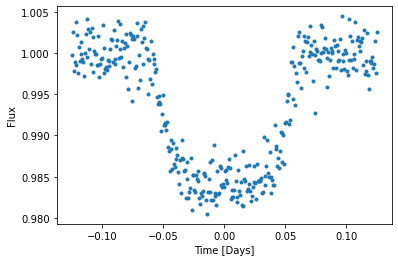

In [180]:
lc = LightCurveSimulator.ShortTransit()
lc.add_noise(sn=500)
lc.plotlc()

## Answer 1

If the radius of the planet decreases by a factor of 10, then the change in flux (which is the observable we are measuring) will decrease by a factor of 100. This means the change in flux will smaller and there is a lower probability the exoplanet will be detected.  

As the change in flux is much smaller, you need to increase the signal to noise ratio, to ensure that the change in flux can still be observed. 

To increase the signal to noise ratio you could increase the exposure time. 

## Question 2

For the same lightcurve, what changes would need to be made to the observations to be able to observe a planet that has an semi major axis that is 10 times smaller? Qualitatively describe your answer. Assume the stellar mass does not change and all planets transit the star centrally.

## Answer 2

If the semi major axis decreased by a factor of 10, then the time period of the planet will decrease by factor 31.6, as a a^3 is proportional to P^2.  Where a = semi major axis and P = time period of the planet. If P is smaller then more transits will be detected in a particular time frame which will improve data. 

The time of the transit (T_transit) is equal to: 

T_transit = P * ( R_sun/pi * a ) 

where R_sun = radius of sun. Hence the T_transit will decrease by a factor of approximately 3.2. A smaller transit time will require more data points whilst the exoplanet is in transit. 

Planets with larger 'a' have a higher probability of being missed in a sample of transit detected planets, therefore decreasing 'a' increases the chances of detection.  This is because a higher 'a' (the further away the planet is from the star,) the larger the probability the transit will be missed, as a smaller misalignment in the plane of the sytem will lead to a missed transit. 

## Question 3

Are space or ground based observatories more suitable for observing exoplanets? Explain your reasoning.

## Answer 3

Space based observations have the advantage that you do not need to worry about the attenuation of photons and noise as the light passes through the atmosphere. Hence you can get an uninterrupted light curve which is very important. 

On the other hand, ground based observations are much cheaper and more accessible. 



## Question 4

You are planning to observe the radial velocity signature of an exoplanet. Which characteristics of the spectrograph used will be important to ensure a suitable dataset?

## Answer 4

The star and planet orbit a common centre of mass.  Need to measure the change in wavelength between absorption lines on a spectrograph.  As the star moves away from the Earth the abosprtion lines will be red-shifted, and as the sun moves towards us the emission lines will be blue-shifted. The following equation can then be used to determine the radial velocity:  

∆ wavelength / wavelength = radial velocity / c 

The change in wavelength can be very small, hence the spectrograph must be very stable with limited Dopppler broadening. 

# Section 2 : Data Analysis & Photometry

## Question 1

What is the flux of the following star? Give your uncertainty.

RON is 4.26


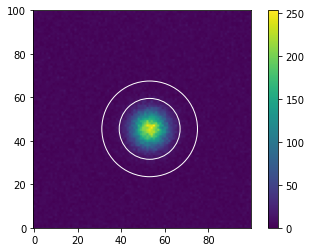

In [181]:
Q1 = ImageSimulator(student_id=studentid, assessmentQ=1, size=(100, 100))

#Add circular annulus to help estimate the centre and radius to use for the image
ringsky = photutils.CircularAnnulus((53, 45.5), 14, 22)
ringsky.plot(ec='white')

## Answer 1:

In [182]:
#the function below gives the flux and uncertainty in the flux for a star
#given the coordinates of the star and a suitable region in the sky

def ap_phot(image, x, y, radius, skyx, skyy, skyinner, skyouter, ron):
    
    #Defining the object aperture
    ap = photutils.CircularAperture((x, y), radius)
    
    #fl_ap: the flux in the object aperture
    fl_ap = aperture_photometry(image, ap)
    
    #Defining the sky aperture, if skyinner=0, create a circular ap, otherwise, create an annulus
    if skyinner == 0:
        ap_sky = photutils.CircularAperture((skyx, skyy), skyouter)
    else:
        ap_sky = photutils.CircularAnnulus((skyx, skyy), skyinner, skyouter)
    
    #fl_sky: the flux in the sky aperture
    fl_sky = aperture_photometry(image, ap_sky)
    
    #defining areas
    obj_area = ap.area    #area of object aperture
    sky_area = ap_sky.area    #area of sky aperture
    
    #equation for object flux
    fl_object = (fl_ap['aperture_sum'])-((fl_sky['aperture_sum'])*(obj_area/sky_area))
    
    #UNCERTAINTY
    
    #the shot noise in the main aperture:
    shot_ap = np.sqrt(fl_ap['aperture_sum'])
    #uncertainty in the sky level
    unc_sky = np.sqrt(fl_sky['aperture_sum'])
    
    #sky level error
    mean_sky = fl_sky['aperture_sum']/sky_area
    sky_level_error = mean_sky/sky_area
    
    #readout noise error
    ron = ron 
    
    #equation for the total error 
    err_obj = np.sqrt(shot_ap**2 + unc_sky**2 + obj_area*(sky_level_error**2) + obj_area*(ron**2))
    
    return fl_object, err_obj

In [183]:
#flux calculated using circular annulus for sky flux measurement 
ap_phot(image = Q1.get_data(), x=53, y=45.5, radius=14, skyx=53, skyy=45.5, skyinner=14, skyouter=22, ron=4.26)

(<Column name='aperture_sum' dtype='float64' length=1>
 39230.21511325783,
 <Column name='aperture_sum' dtype='float64' length=1>
 244.13719846447185)

In [184]:
flux_Q1 = ap_phot(image = Q1.get_data(), x=53, y=45.5, radius=14, skyx=53, skyy=45.5, skyinner=14, skyouter=22, ron=4.26)

#Use indexing to locate the flux and flux uncertainty from the table that the ap_phot() function produces, rounded to two decimal places
print('Flux is:', round(flux_Q1[0][0], 2), '+/-', round(flux_Q1[1][0], 2))

Flux is: 39230.22 +/- 244.14


## Question 2

Explain your reasoning for choosing your aperture size and sky region in Question 1.

## Answer 2:

The aperture size has been chosen to include all the of the light from the star - the radius is a little larger than the visible light from the star in the image.  This size radius will include some extra light and noise from the background star, but not excess, as this would increase the error in the measurement. 

I have chosen the sky region using a circular annulus as shown in the image above.  This sky region has been chosen as there is no visible light from the star in this region.  The larger the aperture for the sky the more noise introduced, so the sky region is kept relatively small. 

## Question 3

Below, you see an image displaying a star. What is the dominant source of noise in your measurement of this star?

RON is 4.86


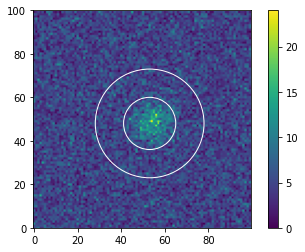

In [185]:
Q3 = ImageSimulator(student_id=studentid, assessmentQ=2, size=(100, 100))

ringsky3 = photutils.CircularAnnulus((53, 48), 12, 25)
ringsky3.plot(ec='white')

## Answer 3:

From the image I would assume that sky noise dominates, as there is lots of background noise seen in the sky. 

The function below determines if sky noise or source noise dominates. 
We assume that error from RON and sky level error should not dominate. 

In [186]:
#function to return the largest uncertainty 

def ap_phot_errors(image, x, y, radius, skyx, skyy, skyinner, skyouter, ron):
    #Defining the object aperture
    ap = photutils.CircularAperture((x, y), radius)
    
    #fl_ap: the flux in the object aperture
    fl_ap = aperture_photometry(image, ap)
    
    #Defining the sky perture, if syinner=0, create a circular ap, otherwise, create an annulus
    if skyinner == 0:
        ap_sky = photutils.CircularAperture((skyx, skyy), skyouter)
    else:
        ap_sky = photutils.CircularAnnulus((skyx, skyy), skyinner, skyouter)
    
    #fl_sky: the flux in the sky aperture
    fl_sky = aperture_photometry(image, ap_sky)
    
    #the areas of each of the apertures
    obj_area = ap.area    #area of object aperture
    sky_area = ap_sky.area    #area of sky aperture
    
    #equation for object flux
    fl_object = (fl_ap['aperture_sum'])-((fl_sky['aperture_sum'])*(obj_area/sky_area))
    
    #UNCERTAINTY
    
    #the shot noise in the main aperture:
    shot_ap = np.sqrt(fl_ap['aperture_sum'])
   
    #uncertainty in the sky level
    unc_sky = np.sqrt(fl_sky['aperture_sum'])
    
    if shot_ap > unc_sky: 
        print('Source noise dominated')
    else:
        print('Sky noise dominated')

In [187]:
ap_phot_errors(image = Q3.get_data(), x=53, y=48, radius=12, skyx=53, skyy=48, skyinner=12, skyouter=20, ron=4.86)

Sky noise dominated


## Question 4: 

Below is a crowded field. If you perform aperture photometry on Star 1, is the flux of star 1 likely to be:

a) measured correctly

b) overestimated or

c) underestimated?

Explain your reasoning? You can use other stars in the field to support your argument.

RON is 2.96


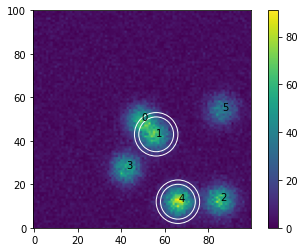

In [188]:
Q4 = ImageSimulator(student_id=studentid, assessmentQ=4, size=(100, 100))
ringskyQ4_star1 = photutils.CircularAnnulus((56, 43), 8, 10)
ringskyQ4_star2 = photutils.CircularAnnulus((66, 12), 8, 10)
ringskyQ4_star1.plot(ec='white')
ringskyQ4_star2.plot(ec='white')

## Answer 4:

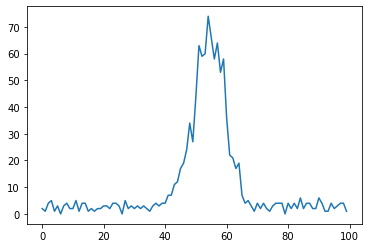

In [189]:
#finding location of star 1 
Q4.plot_y(42)

In [190]:
#flux of star 1 
ap_phot(image = Q4.get_data(), x=56, y=43, radius=8, skyx=20, skyy=20, skyinner=0, skyouter=7, ron=2.96)

(<Column name='aperture_sum' dtype='float64' length=1>
 7424.906797308818,
 <Column name='aperture_sum' dtype='float64' length=1>
 101.60563876215924)

In [191]:
#flux of star 4 
ap_phot(image = Q4.get_data(), x=66, y=12, radius=8, skyx=20, skyy=20, skyinner=0, skyouter=7, ron=2.96)

(<Column name='aperture_sum' dtype='float64' length=1>
 7648.839788295908,
 <Column name='aperture_sum' dtype='float64' length=1>
 102.70169822964705)

MEASURED INCORRECTLY - flux would be OVERESTIMATED as the flux from star zero would be present within the aperture. 

Looking at the image, star 4 appears much brighter than star 1, however when comparing fluxes, they are comparable. This confirms that the flux from star 1 is overestimated. 

## Question 5

The star indicated in the center of image Q5 (Star 1) has an apparent r-band magnitude of r=19.37 +/- 0.04 mag.

Given this information, what is the image zeropoint? Show and document your full working.

RON is 2.63


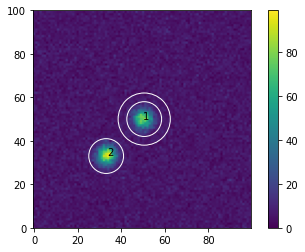

In [192]:
Q5 = ImageSimulator(student_id=studentid, assessmentQ=5, size=(100, 100))

ringsky_Q5 = photutils.CircularAnnulus((50.5, 50), 8, 12)
ringsky_Q5.plot(ec='white')
ringsky_Q5 = photutils.CircularAperture((33, 33), 8)
ringsky_Q5.plot(ec='white')

## Answer 5:

In [193]:
Mag = 19.37 #+/- 0.04 

#calculating the flux from the central star which haa a known magnitude
flux_Q5 = ap_phot(image = Q5.get_data(), x=50.5, y=50, radius=8, skyx=80, skyy=80, skyinner=0, skyouter=5, ron=2.63)
print('Measured flux of star 1:', round(flux_Q5[0][0],2), '+/-' , round(flux_Q5[1][0], 2))

#substituting in the values to the equation for the zeropoint
zeropoint = Mag + 2.5*(np.log10(flux_Q5[0]))
print('\nZero point is equal to', round(zeropoint[0],2))

Measured flux of star 1: 4252.63 +/- 85.39

Zero point is equal to 28.44


## Question 6

Use the zeropoint that you derived in Question 5 to determine the absolute magnitude of the star indicated in the image above. Provide the associated statistical and systematic magnitude uncertainty in your answer.

## Answer 6:

Systematic uncertainty is due to the uncertainty in the zeropoint - resulting from the standard stars magnitude. It is systematic as it affects every measurement by the same amount. 

Statistical/random uncertainty is from the calculated flux value of the star. 

UNCERTAINTY IN ZEROPOINT: 

zeropoint = Mag + 2.5log(flux)

Mag = 19.37 +/- 0.04

Flux = 4252.6 +/- 85.39 

error in 2.5log(flux) term: 

- log(4252.6 +/- 85.39) = 3.629 +/- 0.0086    (using equation for the error x = log(a +/- ∆a) = 0.43 * (∆a / a))

- 2.5*(3.629 +/- 0.0086) = 9.0725 +/- 0.022   (multiplying through by 2.5) 

In [194]:
#zeropoint error equal to the square root of the sum of error in magnitude squared + error in flux term squared
zeropoint_error = np.sqrt((0.04)**2+(0.0220)**2)

#flux and uncertainty in flux of the second star
flux_Q6 = ap_phot(image = Q5.get_data(), x=33, y=33, radius=8, skyx=80, skyy=80, skyinner=0, skyouter=5, ron=2.63)

#uncertainty in the 2.5log(flux) term using same method as above for zeropoint 
flux_Q6_error = 2.5*(0.43*(flux_Q6[1][0]/flux_Q6[0][0]))

#magnitude error 
magnitude_error = np.sqrt((zeropoint_error)**2+(flux_Q6_error)**2)

#magnitude of second star 
magnitude = zeropoint - 2.5*(np.log10(flux_Q6[0][0]))

print('Magnitude:', round(magnitude[0],3), '+/-', round(magnitude_error,3))

print('\nSystematic error:', round(zeropoint_error,3), '\nRandom error:', round(flux_Q6_error,3))



Magnitude: 19.246 +/- 0.05

Systematic error: 0.046 
Random error: 0.02


## Question 7

How would the zeropoint that you measured above change if the observations were taken under worse weather conditions (e.g. if there were thin clouds)?

## Answer 7:

The zeropoint is defined as the magnitude you would measure from the source if it had a count rate of one count per second.  Thin clouds would attenuate some of the light and decrease the number of photons detected, hence the zeropoint would be smaller. 

Zeropoint will acount for any missing photons and convert the measured count rate to the true intrinsic magnitude.  
Mag = zeropoint - 2.5log(Flux) 
If it were cloudy, the zeropoint would be smaller and the measured flux would also be smaller, the magnitude would be the same as when the measurements were taken with no clouds. 

## Question 8

The absolute magnitude of all sources in the image below is known to an accuracy of $\pm$10\% from previous surveys. Which of the numbered sources in the image would be appropriate, and conversely, inappropriate for deriving the image zeropoint? Provide reasons for your response.

RON is 2.68


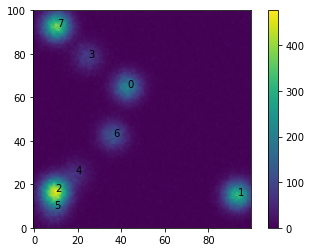

In [195]:
Q8 = ImageSimulator(student_id=studentid, assessmentQ=8, size=(100, 100))

## Answer 8:

When deriving the image zeropoint you need to measure the flux of a star with a known magnitude. The absolute magnitude of all the sources is known to the same accuracy, so the systematic uncertainty should be the same in all the sources. 

However, I think source 1 would be most approporaite as it is furthest from the other stars.  Star 2 would be inappropriate as light from star 5 and star 2 would be detected within the aperture and lead to a incorrect measured flux. 

## Question 9

Which of the science objectives listed below require absolute flux calibration, and which are achievable with relative flux calibration?

a) Detection of an exoplanet using the transit method.

b) The absolute magnitude of the host of an exoplanet.

c) The temperature of the host star.

Provide your reasoning in your answers.

## Answer 9:

a). Detection of an exoplanet using the transit method only requires the change in flux over a time period, which is relative and the absolute flux of the star is not required.  As a result, this is achievable with relative flux calibration. 

b).  To determine the absolute magnitude of a star hosting an exoplanet absolute flux calibration is required, as you need the absolute magnitue which cannot be found from a relative change in flux. 

c).  The temperature of the host star could be calculated using Stefan's Law. The star's luminosity/power ouput would need to be determined, which would require absolute flux calibration. 

## Question 10

The two images below (Q10a, Q10b) show a star targeted for an exoplanet transit in the centre of the image. The second star is the standard star with constant flux. Which of the two images shows the planet in transit?

RON is 2.50


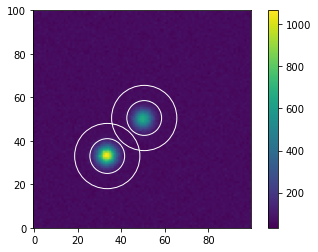

In [196]:
Q10a = ImageSimulator(student_id=studentid, assessmentQ=101, size=(100, 100))
ringskyQ10a = photutils.CircularAnnulus((33.5, 33), 8, 15)
ringskyQ10a.plot(ec='white')
ringskyQ10a = photutils.CircularAnnulus((50.5, 50.5), 8, 15)
ringskyQ10a.plot(ec='white')

RON is 2.50


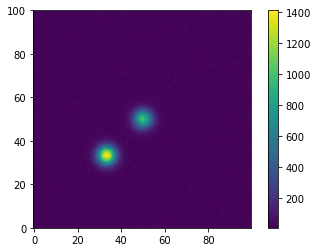

In [197]:
Q10b = ImageSimulator(student_id=studentid, assessmentQ=102, size=(100, 100))

## Answer 10:

In [198]:
#measure the flux of both stars and then see which star's flux decreased???

#Q10a
flux_star1_10a = ap_phot(image = Q10a.get_data(), x=33.5, y=33, radius=8, skyx=60, skyy=10, skyinner=0, skyouter=10, ron=2.5)
flux_star2_10a = ap_phot(image = Q10a.get_data(), x=50.5, y=50.5, radius=8, skyx=60, skyy=10, skyinner=0, skyouter=10, ron=2.5)

#Q10b
flux_star1_10b = ap_phot(image = Q10b.get_data(), x=33.5, y=33, radius=8, skyx=60, skyy=10, skyinner=0, skyouter=10, ron=2.5)
flux_star2_10b = ap_phot(image = Q10b.get_data(), x=50.5, y=50.5, radius=8, skyx=60, skyy=10, skyinner=0, skyouter=10, ron=2.5)


print('Flux star 1 image 10a:', round(flux_star1_10a[0][0],2), '\nFlux star 2 image 10a:', round(flux_star2_10a[0][0],2), '\nFlux star 1 image 10b:', round(flux_star1_10b[0][0],2), '\nFlux star 2 image 10b:', round(flux_star2_10b[0][0], 2))

Flux star 1 image 10a: 54335.15 
Flux star 2 image 10a: 33920.05 
Flux star 1 image 10b: 75452.13 
Flux star 2 image 10b: 52387.79


The first image (10a) shows the exoplanet in transit as the flux is lower - the planet is blocking some of the flux from the star. 

## Question 11

What possible reasons are there for the change in flux in the constant source in the two images above?

## Answer 11:

The standard star's flux decreases by approximataley 28%, and the star target for an exoplanet transit flux decreased by around 35%.  

The second measurement (10b) may have been taken on a cloudy day, so some photons would be absorbed in the Earth's atmosphere explaining the decrease in flux in the standard star.  The other star's flux would decrease both due to any attenuation of photons in the atmospere as well as due to the exoplanet transit blocking some of the stars flux.  

Another reason for change in flux in the constant source could be due to a mark or dust on the telescope affecting the measurements. 